# PREP

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from wildlifeml.utils.io import (
    load_csv, 
    load_json, 
    load_pickle,
)

In [51]:
REPODIR = '/home/lisa-wm/Documents/1_work/1_research/repos/wildlife-experiments'

In [52]:
cfg = load_json(os.path.join(REPODIR, 'configs/cfg.json'))
label_map = load_json(os.path.join(REPODIR, 'data/label_map.json'))

# IN-SAMPLE

In [53]:
RESULTS_INSAMPLE_PERF = load_pickle('results/202302071549_insample_perf.pickle')

In [54]:
for k in RESULTS_INSAMPLE_PERF.keys():
    print(f'{k}: {len(eval_details_dict[k])}')

keys_bbox_empty: 2112
keys_bbox_nonempty: 2038
preds_bbox_empty: 2112
preds_bbox_nonempty: 2038
preds_imgs: 1544
truth_imgs: 1544


In [80]:
RESULTS_INSAMPLE_PERF['preds_bbox_nonempty']

array([[2.5293015e-02, 6.5058307e-04, 1.5022964e-02, ..., 2.6770823e-03,
        9.5186281e-01, 6.9255236e-04],
       [9.3717182e-01, 1.8055915e-04, 1.9708415e-02, ..., 6.5684235e-03,
        3.6173511e-02, 1.4255178e-04],
       [2.9845381e-01, 1.7630477e-01, 1.8693541e-01, ..., 4.7554658e-03,
        1.9745050e-01, 2.7413281e-02],
       ...,
       [8.6769009e-01, 2.7434206e-05, 3.3148841e-03, ..., 1.3289380e-06,
        1.2896118e-01, 3.9661440e-06],
       [2.3924674e-04, 5.0420917e-06, 7.5244723e-04, ..., 1.8205403e-05,
        9.9788082e-01, 5.3772023e-06],
       [3.9084599e-04, 2.7187600e-06, 1.1385054e-04, ..., 7.8676230e-06,
        9.9932849e-01, 2.9813698e-06]], dtype=float32)

In [55]:
report = classification_report(
    y_true=RESULTS_INSAMPLE_PERF['truth_imgs'], 
    y_pred=[np.argmax(v) for v in RESULTS_INSAMPLE_PERF['preds_imgs'].values()],
    target_names=list(label_map.keys())
)
print(report)

               precision    recall  f1-score   support

        empty       0.77      0.76      0.76       298
european_hare       0.76      0.51      0.61        63
       others       0.42      0.25      0.32       106
     red_deer       0.33      0.50      0.40         2
      red_fox       0.77      0.53      0.63       105
 red_squirrel       0.94      0.44      0.60        36
     roe_deer       0.83      0.95      0.89       905
    wild_boar       0.78      0.24      0.37        29

     accuracy                           0.80      1544
    macro avg       0.70      0.52      0.57      1544
 weighted avg       0.78      0.80      0.78      1544



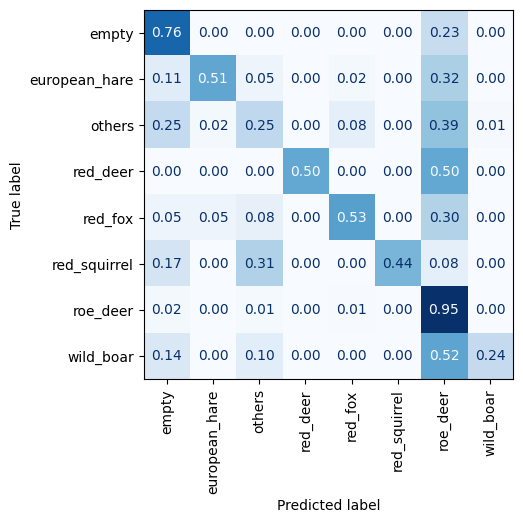

In [78]:
ConfusionMatrixDisplay.from_predictions(
    y_true=RESULTS_INSAMPLE_PERF['truth_imgs'], 
    y_pred=[np.argmax(v) for v in RESULTS_INSAMPLE_PERF['preds_imgs'].values()],
    normalize='true',
    values_format='.2f',
    display_labels=list(label_map.keys()),
    xticks_rotation='vertical',
    colorbar=False,
    cmap='Blues',
)

In [ ]:
import matplotlib.pyplot as plt